**Installing TensorFlow**

In [1]:
!pip install tensorflow==2.0.0-rc0

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
mnist = keras.datasets.fashion_mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [7]:
print(np.max(X_train))
print(np.max(X_test))

255
255


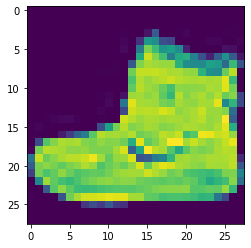

In [8]:
plt.figure()
plt.imshow(X_train[0])

In [0]:
X_train = X_train/255
X_test = X_test/255

**Neural Network**

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [0]:
model = Sequential()
model.add(Flatten(input_shape=X_train[0].shape))
model.add(Dense(200, activation='relu'))
model.add(Dense(120, activation='relu'))
model.add(Dense(120, activation='relu'))
model.add(Dense(120, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 120)               24120     
_________________________________________________________________
dense_2 (Dense)              (None, 120)               14520     
_________________________________________________________________
dense_3 (Dense)              (None, 120)               14520     
_________________________________________________________________
dense_4 (Dense)              (None, 50)                6050      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5

In [0]:
model.compile(optimizer='adam', metrics=['accuracy'], loss='sparse_categorical_crossentropy')

In [14]:
history = model.fit(X_train, y_train, batch_size=10000, epochs=150)

Train on 60000 samples
Epoch 1/150
60000/60000 [==============================] - 3s 46us/sample - loss: 2.0789 - accuracy: 0.3049
Epoch 2/150
60000/60000 [==============================] - 2s 29us/sample - loss: 1.3404 - accuracy: 0.5925
Epoch 3/150
60000/60000 [==============================] - 2s 28us/sample - loss: 0.8668 - accuracy: 0.6929
Epoch 4/150
60000/60000 [==============================] - 2s 29us/sample - loss: 0.7290 - accuracy: 0.7370
Epoch 5/150
60000/60000 [==============================] - 2s 29us/sample - loss: 0.6406 - accuracy: 0.7631
Epoch 6/150
60000/60000 [==============================] - 2s 29us/sample - loss: 0.5769 - accuracy: 0.7873
Epoch 7/150
60000/60000 [==============================] - 2s 28us/sample - loss: 0.5405 - accuracy: 0.8034
Epoch 8/150
60000/60000 [==============================] - 2s 28us/sample - loss: 0.5146 - accuracy: 0.8139
Epoch 9/150
60000/60000 [==============================] - 2s 29us/sample - loss: 0.5003 - accuracy: 0.8214
Epoch

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
y_pred = model.predict_classes(X_test)

In [17]:
print(accuracy_score(y_test, y_pred))

0.8873


In [18]:
print(y_test)

[9 2 1 ... 8 1 5]


In [19]:
print(y_pred)

[9 2 1 ... 8 1 5]


**Learning Curves**

In [0]:
## Accuracy with number of Epochs

AttributeError: ignored

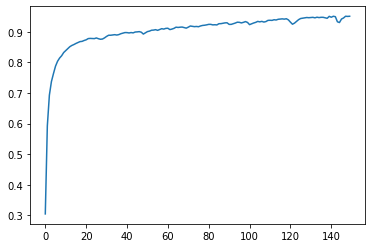

In [21]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.label('Model Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')

In [0]:
## Loss with number of Epochs

AttributeError: ignored

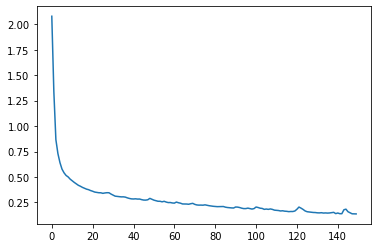

In [23]:
plt.figure()
plt.plot(history.history['loss'])
plt.label('Model Loss')
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')

**Confusion Matrix**

In [24]:
!pip install mlxtend

In [0]:
from mlxtend.plotting import plot_confusion_matrix

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
mat = confusion_matrix(y_test, y_pred)

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f759c265a90>)

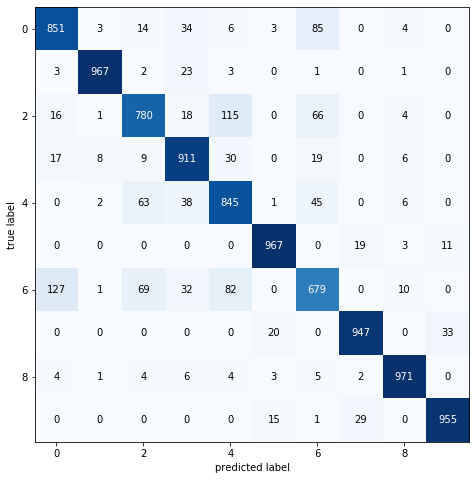

In [28]:
plot_confusion_matrix(conf_mat=mat, figsize=(8, 8))